**TAREA 3 - ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

**Realizado por:**

**LUIS CARLOS PIMIENTA HENAO**

**Grupo: 202016908_1**

**UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD**

**PROGRAMA DE INGENIERIA DE SISTEMAS**

**ANALISIS DE DATOS**

**BARRANQUILLA (ATLÁNTICO)**

**ABRIL 2024**ABRIL 2024.

**REGRESIÓN LINEAL**

**1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [73]:
#Cargar Librerias.

import pandas as pd
import sklearn.metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Cargar libreria implementar modelos ciencia de datos.
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score,accuracy_score
from sklearn.linear_model import LinearRegression # (Libreria Regresión Lineal)
from sklearn.metrics import classification_report, confusion_matrix


In [74]:
#Lectura datos Pyton y se cargan las variables

Datos=pd.read_csv('car data.csv')

In [75]:
Datos.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [76]:
Datos.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [77]:
#Descripción de los datos

Datos.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

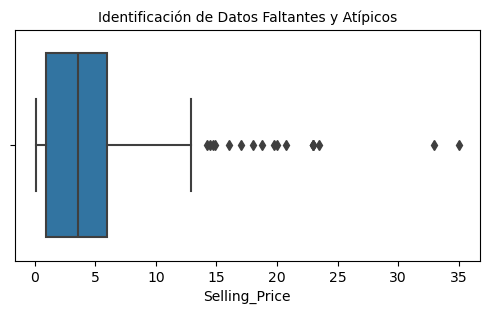

In [78]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Selling_Price'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

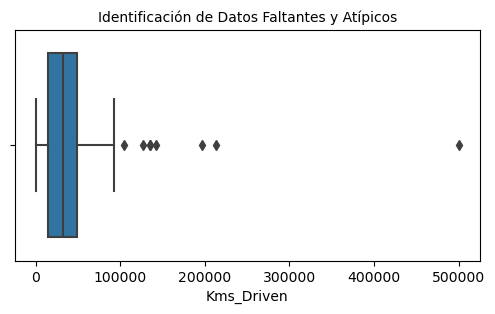

In [79]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Kms_Driven'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

**------------------------------------------------------------------**

**2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.**

In [80]:
Datos.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [81]:
#Revisión de Datos Faltantes

print("Cantidad de Registros con cero en Nombre: ", Datos['Car_Name'].isin([0]).sum())
print("Cantidad de Registros con cero en Año: ", Datos['Year'].isin([0]).sum())
print("Cantidad de Registros con cero en Precio de Ventas: ", Datos['Selling_Price'].isin([0]).sum())
print("Cantidad de Registros con cero en Precio de Ventas: ", Datos['Present_Price'].isin([0]).sum())
print("Cantidad de Registros con cero en Kilometros Recorridos: ", Datos['Kms_Driven'].isin([0]).sum())
print("Cantidad de Registros con cero en Combustible: ", Datos['Fuel_Type'].isin([0]).sum())
print("Cantidad de Registros con cero en Tipo Vendedor: ", Datos['Seller_Type'].isin([0]).sum())
print("Cantidad de Registros con cero en Transmisión: ", Datos['Transmission'].isin([0]).sum())
print("Cantidad de Registros con cero en Propietario: ", Datos['Owner'].isin([0]).sum())




Cantidad de Registros con cero en Nombre:  0
Cantidad de Registros con cero en Año:  0
Cantidad de Registros con cero en Precio de Ventas:  0
Cantidad de Registros con cero en Precio de Ventas:  0
Cantidad de Registros con cero en Kilometros Recorridos:  0
Cantidad de Registros con cero en Combustible:  0
Cantidad de Registros con cero en Tipo Vendedor:  0
Cantidad de Registros con cero en Transmisión:  0
Cantidad de Registros con cero en Propietario:  290


In [82]:
Datos ['Owner']=Datos['Owner'].replace(0,Datos['Owner'].mean())


In [83]:
print("Cantidad de Registros con cero en Nombre: ", Datos['Car_Name'].isin([0]).sum())
print("Cantidad de Registros con cero en Año: ", Datos['Year'].isin([0]).sum())
print("Cantidad de Registros con cero en Precio de Ventas: ", Datos['Selling_Price'].isin([0]).sum())
print("Cantidad de Registros con cero en Precio de Ventas: ", Datos['Present_Price'].isin([0]).sum())
print("Cantidad de Registros con cero en Kilometros Recorridos: ", Datos['Kms_Driven'].isin([0]).sum())
print("Cantidad de Registros con cero en Combustible: ", Datos['Fuel_Type'].isin([0]).sum())
print("Cantidad de Registros con cero en Tipo Vendedor: ", Datos['Seller_Type'].isin([0]).sum())
print("Cantidad de Registros con cero en Transmisión: ", Datos['Transmission'].isin([0]).sum())
print("Cantidad de Registros con cero en Propietario: ", Datos['Owner'].isin([0]).sum())

Cantidad de Registros con cero en Nombre:  0
Cantidad de Registros con cero en Año:  0
Cantidad de Registros con cero en Precio de Ventas:  0
Cantidad de Registros con cero en Precio de Ventas:  0
Cantidad de Registros con cero en Kilometros Recorridos:  0
Cantidad de Registros con cero en Combustible:  0
Cantidad de Registros con cero en Tipo Vendedor:  0
Cantidad de Registros con cero en Transmisión:  0
Cantidad de Registros con cero en Propietario:  0


In [84]:
Datos.dtypes # Analizamos los tipos de datos

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner            float64
dtype: object

In [85]:
# Se convierten datos float y otros en int

#Datos['Car_Name'] = Datos['Car_Name'].astype(int)
Datos['Year'] = Datos['Year'].astype(int)
Datos['Selling_Price'] = Datos['Selling_Price'].astype(int)
Datos['Present_Price'] = Datos['Present_Price'].astype(int)
Datos['Kms_Driven'] = Datos['Kms_Driven'].astype(int)
#Datos['Fuel_Type'] = Datos['Fuel_Type'].astype(int)
#Datos['Seller_Type'] = Datos['Seller_Type'].astype(int)
#Datos['Transmission'] = Datos['Transmission'].astype(int)
Datos['Owner'] = Datos['Owner'].astype(int)

In [86]:
Datos.dtypes # Analizamos los tipos de datos

Car_Name         object
Year              int32
Selling_Price     int32
Present_Price     int32
Kms_Driven        int32
Fuel_Type        object
Seller_Type      object
Transmission     object
Owner             int32
dtype: object

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

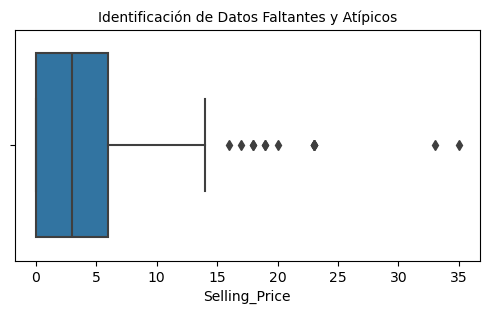

In [87]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Selling_Price'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

In [88]:
#Conteo Datos Atípicos

# Vehiculos hasta el año 2003 son obsoletos y viejos, son atipicos

fecha_maxima<=2006
Total_Atipicos=((Datos['Year']<=fecha_maxima)).sum()
print("El total de datos atipicos es: {}".format(Total_Atipicos))

El total de datos atipicos es: 11


In [89]:
#Conteo Datos Atípicos

# Los vehiculos deben tener un Kilometraje como maximo hasta 200.000 km

km_maximo=200000
Total_Atipicos=((Datos['Kms_Driven']>=km_maximo)).sum()
print("El total de datos atipicos es: {}".format(Total_Atipicos))

El total de datos atipicos es: 2


In [90]:
#Revision tipo de datos

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Name       301 non-null    object
 1   Year           301 non-null    int32 
 2   Selling_Price  301 non-null    int32 
 3   Present_Price  301 non-null    int32 
 4   Kms_Driven     301 non-null    int32 
 5   Fuel_Type      301 non-null    object
 6   Seller_Type    301 non-null    object
 7   Transmission   301 non-null    object
 8   Owner          301 non-null    int32 
dtypes: int32(5), object(4)
memory usage: 15.4+ KB


**3.	Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.**

In [91]:
# Fecha Modelo Vehiculo

Datos['Year'].value_counts()

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

In [92]:
# Fecha Modelo Vehiculo

Datos['Kms_Driven'].value_counts()

Kms_Driven
45000    9
15000    9
40000    5
35000    5
50000    5
        ..
1400     1
1200     1
4100     1
21700    1
5464     1
Name: count, Length: 206, dtype: int64

In [93]:
# Precio venta vehiculo

Datos['Selling_Price'].value_counts()

Selling_Price
0     78
4     34
5     30
1     29
3     28
2     24
6     17
7     15
8     10
9      8
11     6
23     4
14     4
10     3
18     2
19     2
12     2
16     1
33     1
35     1
20     1
17     1
Name: count, dtype: int64

In [94]:
# Precio presente vehiculo

Datos['Present_Price'].value_counts()

Present_Price
0     71
7     27
1     27
9     25
5     22
13    19
6     18
4     17
8     13
10    10
18     7
3      7
30     5
14     5
12     4
2      4
35     3
20     3
11     3
23     2
22     2
25     2
19     1
15     1
36     1
92     1
16     1
Name: count, dtype: int64

**4.	Dividir el dataset en Train y Test para evaluar correctamente el modelo.**

In [95]:
#Se crean los modelos de Entrenamiento y Prueba (Train y test)

X = Datos[['Year','Selling_Price','Kms_Driven','Owner']]
Y = Datos['Present_Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [96]:
print (X_train)

     Year  Selling_Price  Kms_Driven  Owner
146  2014              0       15000      0
260  2016              9       29223      0
37   2003              0      127000      0
273  2010              2       61203      0
164  2016              0       14000      0
..    ...            ...         ...    ...
251  2013              5       56701      0
192  2007              0       49000      1
117  2015              1       14000      0
47   2006              1       65000      0
172  2014              0       13700      0

[225 rows x 4 columns]


In [97]:
print (Y_train)

146     0
260    13
37      2
273     7
164     0
       ..
251     9
192     0
117     1
47      4
172     0
Name: Present_Price, Length: 225, dtype: int32


**5.	Entrenar el modelo configurando los diferentes hiperparámetros.**

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
modelo_regresion = LinearRegression ()
modelo_regresion.fit(X_train, Y_train)
Prediccion = modelo_regresion.predict(X_test)

In [100]:
print (Y_test)

223     9
150     0
226     5
296    11
52     19
       ..
46      4
158     0
230     9
179     1
27      6
Name: Present_Price, Length: 76, dtype: int32


In [101]:
Prediccion

array([12.90954265,  1.4310924 ,  7.4396465 , 13.67991344, 28.18546019,
        6.58222477,  6.15178851, -1.99604638,  7.15423412,  7.86915526,
        5.00203774, -2.00080338,  6.04439711, 10.76137279, 10.35185083,
       29.85430557, 10.08602035,  6.5544323 ,  1.65942823, -0.96125319,
        8.67731352,  8.88061149,  8.90107522, 16.98604629,  3.97258931,
       -2.63390417,  2.08755792, -0.43015401,  0.82177659,  8.51251955,
       10.04087058, 11.75124832, -0.41588302, 11.84252766,  8.50835242,
       -0.21588728,  8.38809069,  5.87851854,  5.96754625, 13.60085957,
       12.02442779, 32.16746665,  7.24759703,  8.1576204 ,  8.30890362,
       18.81913174,  0.30760071, -0.24157506,  9.07274571,  9.22980481,
       11.43728655,  1.52716725,  7.4229188 , 38.37624228, -0.12740714,
        0.62461857,  0.1744048 ,  5.33010876,  7.37436889,  3.5285821 ,
       11.26374457,  6.963534  ,  4.33746465, 53.70335461,  4.78111376,
        6.80075168, 12.89712689,  8.43640761, -2.66910594,  5.19

**---------------------------------------------------------------------**

**6.	Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.**

In [102]:
from sklearn.metrics import classification_report
print(classification_report(Y, Y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        25
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          18       1.00    

**--------------------------------------------------------------------------------**

**7.	Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.**

In [103]:
Datos.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3,5,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4,9,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7,9,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2,4,5200,Petrol,Dealer,Manual,0
4,swift,2014,4,6,42450,Diesel,Dealer,Manual,0


In [111]:
Y = Datos[['Selling_Price','Present_Price','Kms_Driven']]
Y = Datos['Year']

In [112]:
confusion_matrix(Y,Y)

array([[ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 61,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

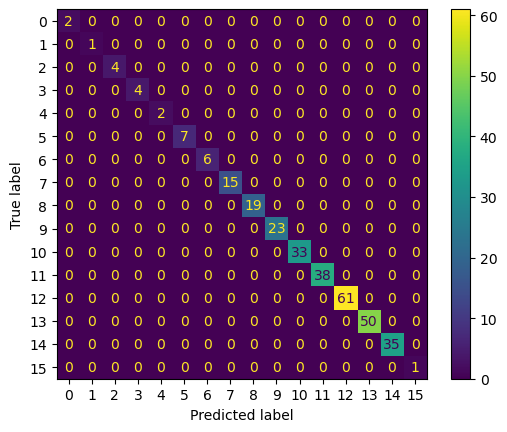

In [113]:
cm = confusion_matrix(Y, Y)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()